# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t120_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,139.963656,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
0,1400.0,1596.0,2101.0,2262.0,2509.0,2702.0,2677.0,2943.0,3330.0,3450.0,...,7243.0,7291.0,7227.0,7090.0,6981.0,7146.0,7033.0,7110.0,7210.0,7222.0
1,1426.0,1687.0,2070.0,2215.0,2517.0,2664.0,2812.0,3098.0,3358.0,3609.0,...,7470.0,7296.0,7263.0,7663.0,7452.0,7246.0,7408.0,7461.0,7268.0,7221.0
2,1393.0,1733.0,2086.0,2446.0,2593.0,2762.0,2840.0,3009.0,3350.0,3544.0,...,7462.0,7142.0,7414.0,7335.0,7193.0,7343.0,7296.0,7311.0,7181.0,7148.0
3,1384.0,1795.0,2075.0,2267.0,2643.0,2621.0,2776.0,3140.0,3236.0,3502.0,...,7510.0,7563.0,7483.0,7442.0,7331.0,7480.0,7176.0,7114.0,7441.0,7310.0
4,1471.0,1775.0,2082.0,2357.0,2635.0,2764.0,2787.0,3201.0,3492.0,3497.0,...,7517.0,7505.0,7531.0,7580.0,7461.0,7323.0,7602.0,7296.0,7533.0,7424.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,411.0,415.0,493.0,553.0,703.0,697.0,626.0,746.0,741.0,750.0,...,667.0,681.0,732.0,715.0,679.0,703.0,759.0,667.0,790.0,734.0
1271,373.0,442.0,550.0,593.0,715.0,628.0,641.0,739.0,821.0,779.0,...,759.0,658.0,674.0,722.0,693.0,731.0,797.0,781.0,779.0,756.0
1272,426.0,415.0,503.0,544.0,615.0,661.0,620.0,678.0,737.0,761.0,...,735.0,720.0,772.0,758.0,729.0,754.0,763.0,710.0,794.0,744.0
1273,465.0,400.0,498.0,532.0,712.0,636.0,668.0,752.0,824.0,815.0,...,769.0,707.0,751.0,707.0,719.0,730.0,781.0,839.0,817.0,852.0


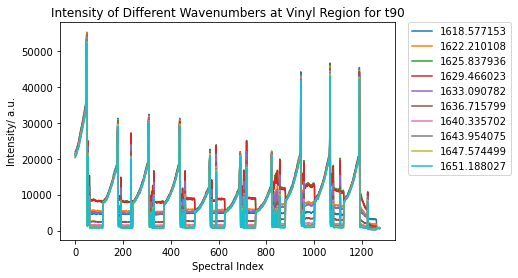

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t90')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [5]:
# df.loc[:,'1629.466023'] --> When using loc.
df.columns.get_loc('1629.466023') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.466023'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

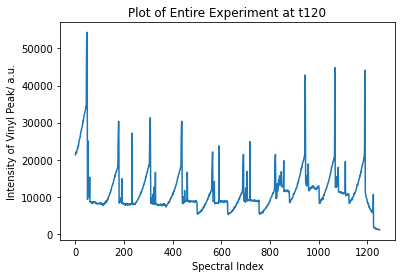

In [8]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:1250,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t120')
plt.show()

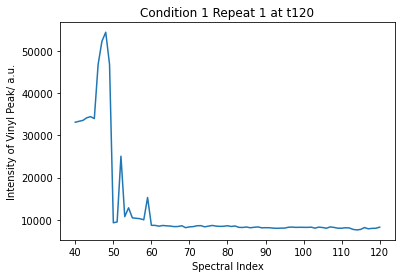

In [15]:
# Condition
df.loc[40:120,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 1 at t120')
plt.show()

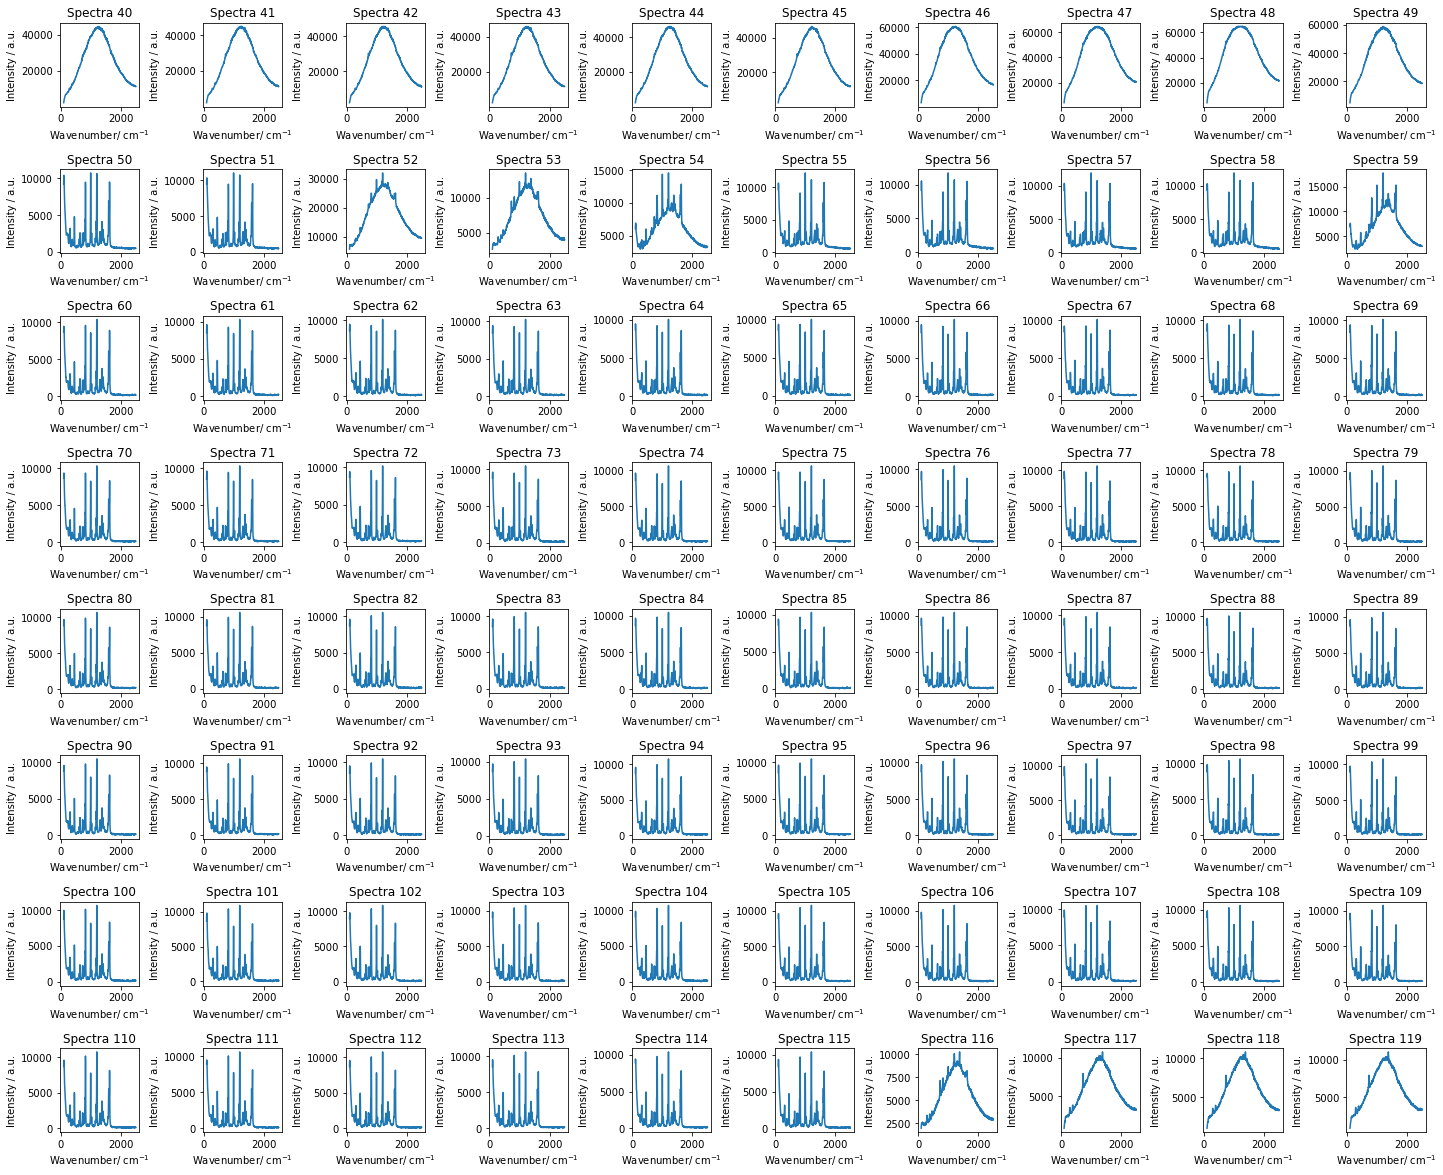

In [17]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(40, 120):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-39))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [19]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[91:110, :]
condition1_ss.insert(loc = 0, column = 'Condition', value = 'C1_R1')
condition1_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
91,C1_R1,8862.0,9434.0,9463.0,8940.0,8046.0,7560.0,6535.0,5880.0,5800.0,...,138.0,117.0,157.0,173.0,99.0,174.0,149.0,145.0,129.0,190.0
92,C1_R1,8473.0,9471.0,9488.0,9014.0,8129.0,7372.0,6619.0,5891.0,5608.0,...,105.0,63.0,193.0,95.0,174.0,162.0,169.0,144.0,151.0,152.0
93,C1_R1,8700.0,9357.0,9703.0,8901.0,8187.0,7381.0,6661.0,5979.0,5499.0,...,74.0,96.0,178.0,142.0,108.0,140.0,135.0,150.0,182.0,163.0
94,C1_R1,8760.0,9131.0,9566.0,8996.0,8178.0,7358.0,6592.0,6201.0,5481.0,...,109.0,125.0,159.0,175.0,159.0,154.0,177.0,77.0,194.0,113.0
95,C1_R1,8579.0,9359.0,9611.0,9183.0,8067.0,7335.0,6469.0,6073.0,5525.0,...,145.0,148.0,197.0,167.0,129.0,108.0,154.0,150.0,149.0,157.0
96,C1_R1,8759.0,9531.0,9705.0,9224.0,8207.0,7514.0,6462.0,6123.0,5830.0,...,98.0,119.0,126.0,147.0,120.0,142.0,140.0,102.0,142.0,166.0
97,C1_R1,8601.0,9720.0,9868.0,9170.0,8337.0,7373.0,6634.0,6071.0,5693.0,...,157.0,101.0,197.0,152.0,167.0,111.0,162.0,135.0,168.0,128.0
98,C1_R1,8859.0,9725.0,9855.0,9152.0,8437.0,7617.0,6620.0,6291.0,5844.0,...,122.0,127.0,154.0,132.0,155.0,148.0,167.0,156.0,188.0,140.0
99,C1_R1,8984.0,9761.0,9709.0,9045.0,8446.0,7552.0,6581.0,6159.0,5797.0,...,132.0,105.0,184.0,160.0,172.0,140.0,169.0,144.0,165.0,160.0
100,C1_R1,8785.0,9937.0,9866.0,8843.0,8483.0,7474.0,6698.0,6072.0,5669.0,...,70.0,87.0,124.0,175.0,121.0,120.0,205.0,157.0,175.0,123.0


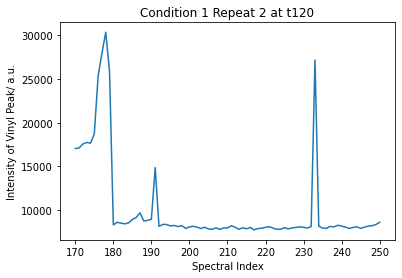

In [23]:
# Condition
df.loc[170:250,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 2 at t120')
plt.show()

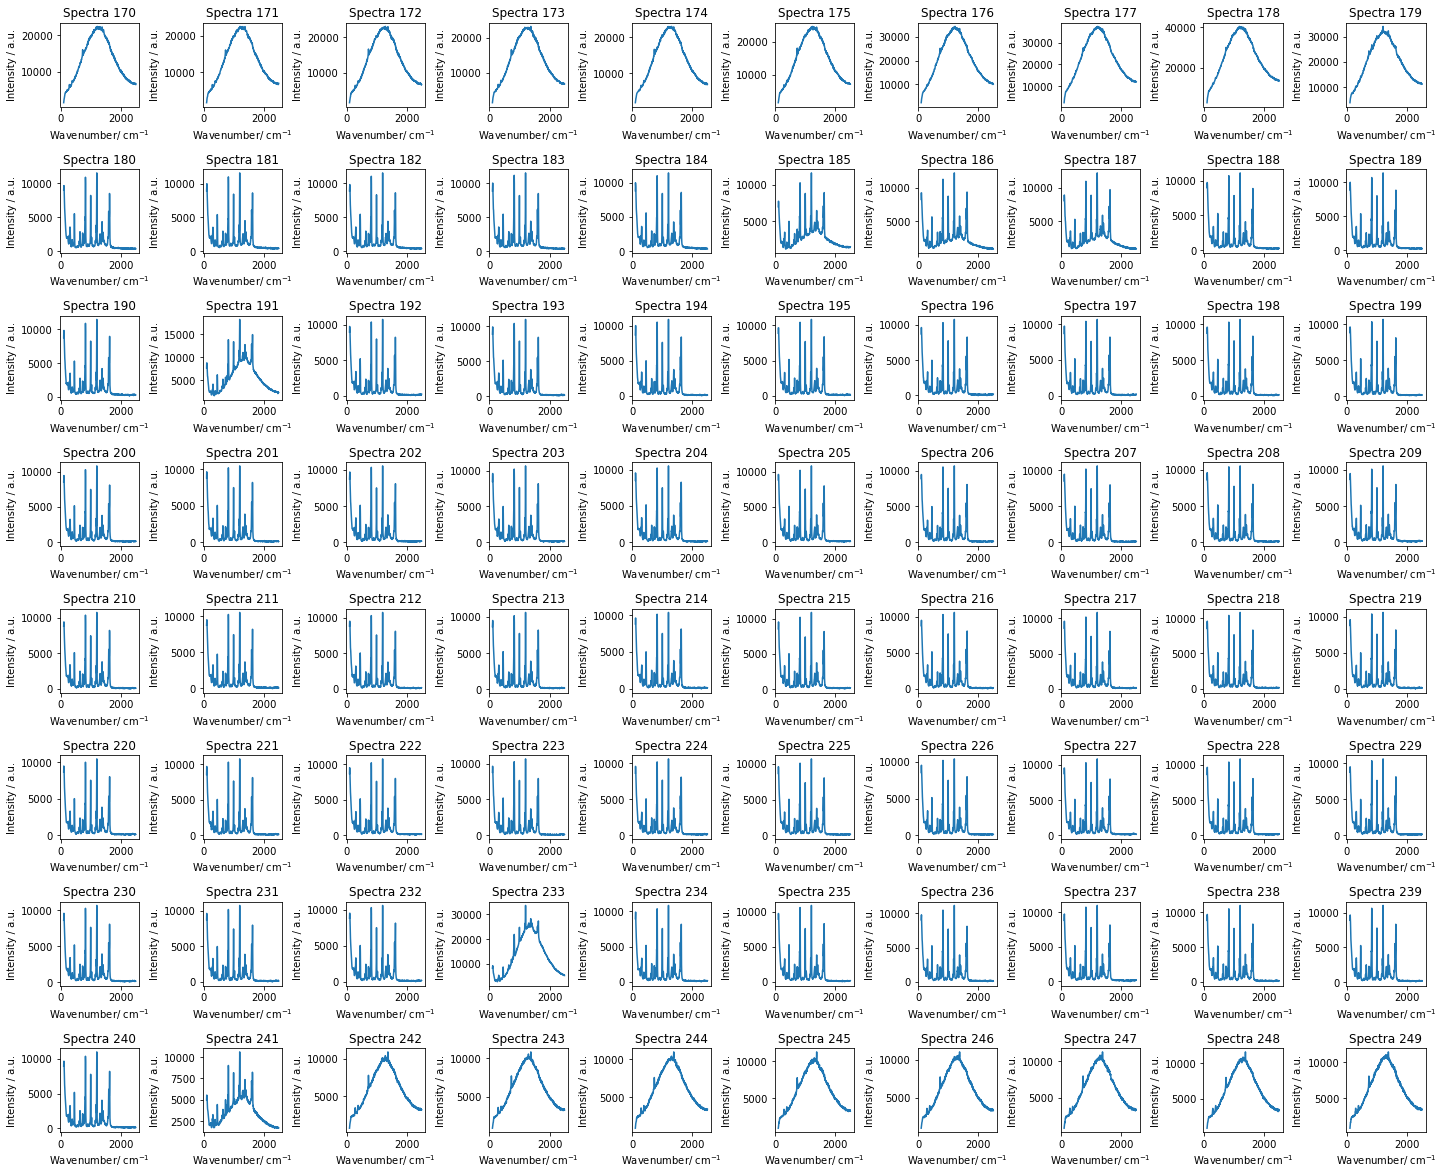

In [24]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(170, 250):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-169))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [25]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[211:230, :]
condition2_ss.insert(loc = 0, column = 'Condition', value = 'C1_R2')
condition2_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
211,C1_R2,8782.0,9258.0,9540.0,8893.0,8121.0,7354.0,6604.0,6015.0,5548.0,...,158.0,53.0,156.0,151.0,141.0,138.0,154.0,153.0,147.0,83.0
212,C1_R2,8812.0,9417.0,9500.0,9146.0,8101.0,7329.0,6734.0,5791.0,5571.0,...,124.0,70.0,149.0,138.0,107.0,151.0,125.0,110.0,143.0,148.0
213,C1_R2,8650.0,9297.0,9504.0,9088.0,8230.0,7365.0,6634.0,6080.0,5620.0,...,136.0,88.0,138.0,194.0,128.0,92.0,126.0,139.0,157.0,140.0
214,C1_R2,8799.0,9504.0,9612.0,8911.0,8156.0,7387.0,6617.0,5997.0,5514.0,...,97.0,53.0,119.0,75.0,103.0,58.0,141.0,143.0,118.0,116.0
215,C1_R2,8546.0,9374.0,9531.0,9090.0,8154.0,7455.0,6627.0,5990.0,5619.0,...,71.0,103.0,178.0,170.0,124.0,106.0,134.0,157.0,153.0,144.0
216,C1_R2,8762.0,9337.0,9510.0,8881.0,8386.0,7437.0,6647.0,5997.0,5557.0,...,86.0,35.0,150.0,111.0,79.0,117.0,110.0,83.0,160.0,157.0
217,C1_R2,8624.0,9392.0,9604.0,9220.0,8159.0,7437.0,6600.0,6017.0,5556.0,...,92.0,60.0,146.0,154.0,130.0,105.0,142.0,76.0,181.0,145.0
218,C1_R2,8526.0,9423.0,9549.0,9082.0,8211.0,7465.0,6593.0,5999.0,5687.0,...,83.0,123.0,115.0,142.0,108.0,120.0,155.0,102.0,105.0,144.0
219,C1_R2,8801.0,9520.0,9596.0,8910.0,8156.0,7399.0,6647.0,6124.0,5564.0,...,133.0,102.0,168.0,100.0,126.0,129.0,162.0,128.0,161.0,97.0
220,C1_R2,8716.0,9513.0,9368.0,9025.0,7958.0,7436.0,6566.0,6014.0,5426.0,...,137.0,86.0,104.0,139.0,131.0,115.0,128.0,86.0,137.0,125.0


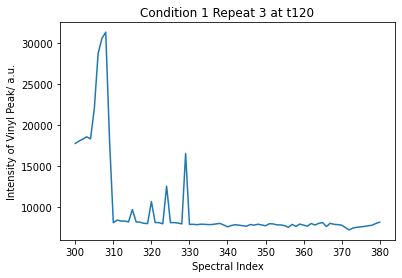

In [28]:
# Condition
df.loc[300:380,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 3 at t120')
plt.show()

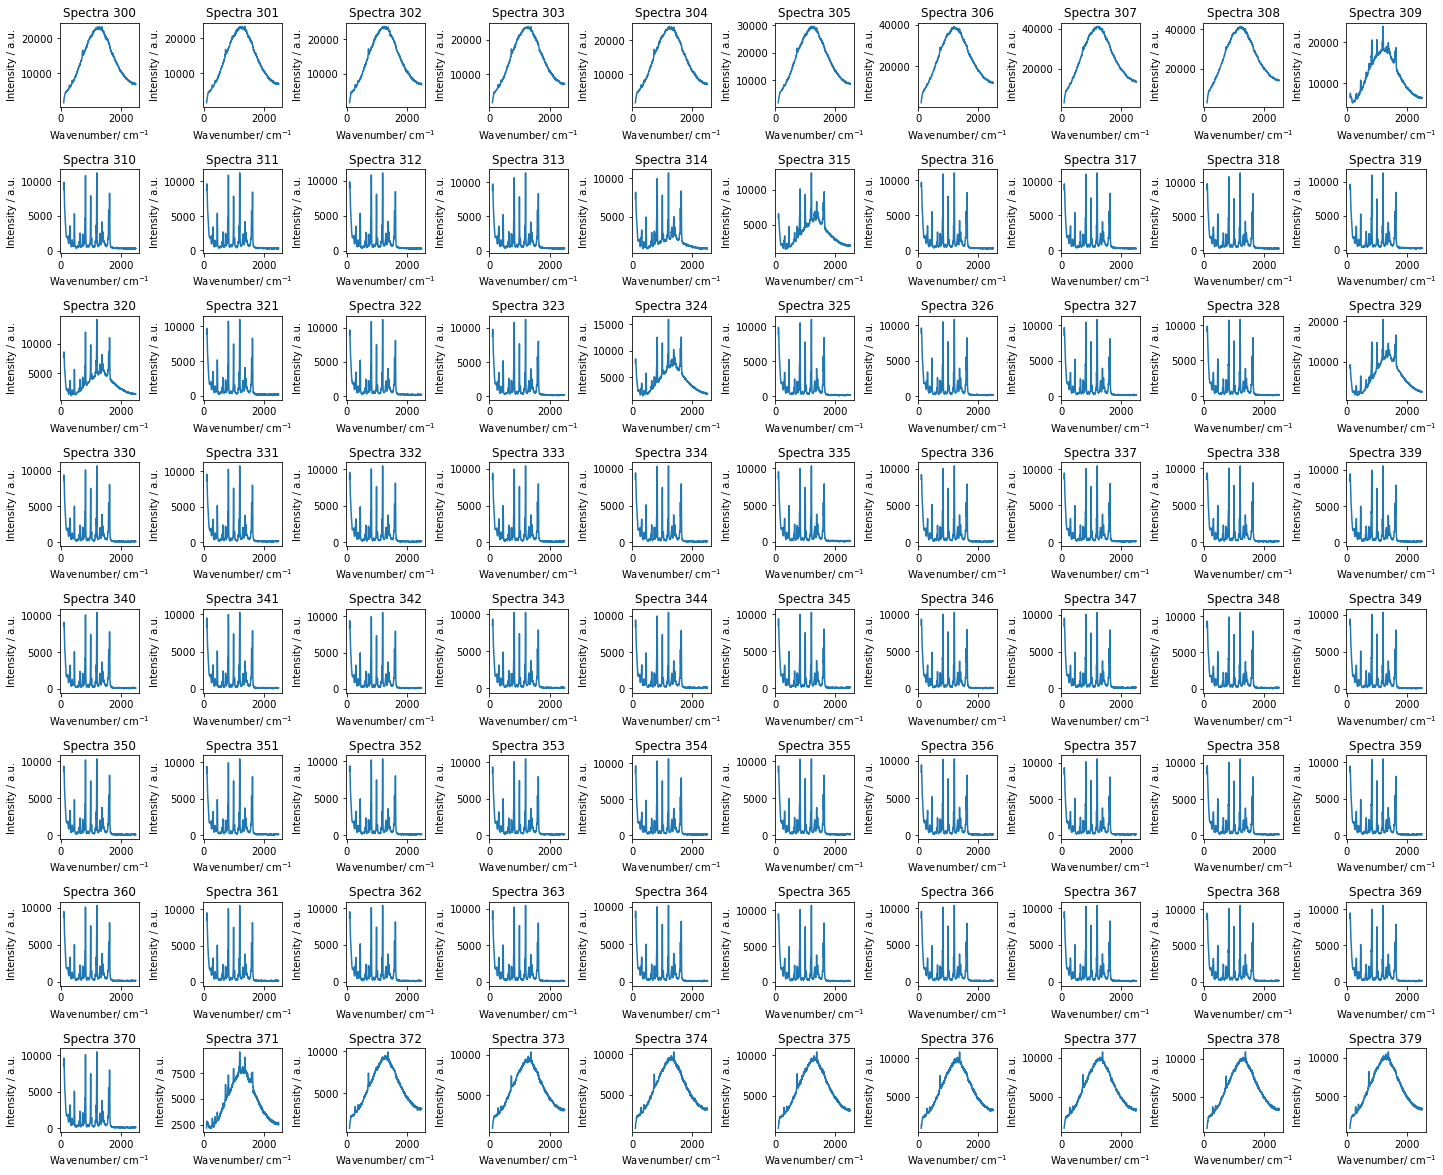

In [29]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(300, 380):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-299))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [30]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[351:370, :]
condition3_ss.insert(loc = 0, column = 'Condition', value = 'C1_R3')
condition3_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
351,C1_R3,8521.0,9306.0,9439.0,8732.0,8188.0,7225.0,6488.0,5882.0,5497.0,...,78.0,55.0,105.0,133.0,140.0,148.0,110.0,153.0,115.0,110.0
352,C1_R3,8632.0,9327.0,9290.0,8825.0,8136.0,7248.0,6366.0,5873.0,5503.0,...,116.0,52.0,103.0,138.0,73.0,92.0,109.0,104.0,58.0,118.0
353,C1_R3,8562.0,9380.0,9263.0,8880.0,7995.0,7305.0,6434.0,5812.0,5686.0,...,78.0,94.0,141.0,132.0,81.0,113.0,161.0,85.0,132.0,134.0
354,C1_R3,8628.0,9326.0,9604.0,8840.0,8158.0,7353.0,6573.0,5893.0,5614.0,...,117.0,98.0,138.0,151.0,129.0,92.0,145.0,100.0,73.0,115.0
355,C1_R3,8505.0,9184.0,9355.0,8752.0,7888.0,7227.0,6492.0,5896.0,5740.0,...,72.0,79.0,100.0,188.0,111.0,128.0,105.0,58.0,138.0,105.0
356,C1_R3,8447.0,9204.0,9452.0,8753.0,7956.0,7003.0,6486.0,5873.0,5475.0,...,66.0,60.0,142.0,131.0,159.0,110.0,134.0,96.0,132.0,94.0
357,C1_R3,8494.0,9327.0,9322.0,8971.0,8077.0,7258.0,6336.0,5926.0,5660.0,...,81.0,50.0,134.0,157.0,111.0,105.0,111.0,82.0,167.0,104.0
358,C1_R3,8469.0,9475.0,9581.0,9066.0,8131.0,7460.0,6468.0,5980.0,5506.0,...,124.0,145.0,188.0,132.0,118.0,144.0,93.0,156.0,121.0,106.0
359,C1_R3,8714.0,9472.0,9293.0,8781.0,8075.0,7154.0,6603.0,5924.0,5507.0,...,103.0,84.0,152.0,88.0,121.0,105.0,103.0,83.0,143.0,147.0
360,C1_R3,8727.0,9482.0,9489.0,9057.0,8096.0,7395.0,6510.0,6096.0,5464.0,...,112.0,145.0,145.0,177.0,172.0,147.0,156.0,118.0,154.0,137.0


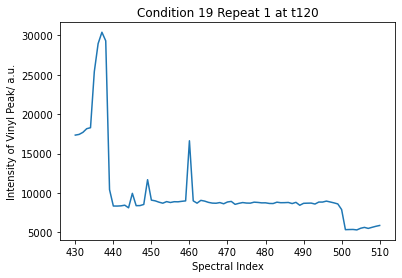

In [32]:
# Condition
df.loc[430:510,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 1 at t120')
plt.show()

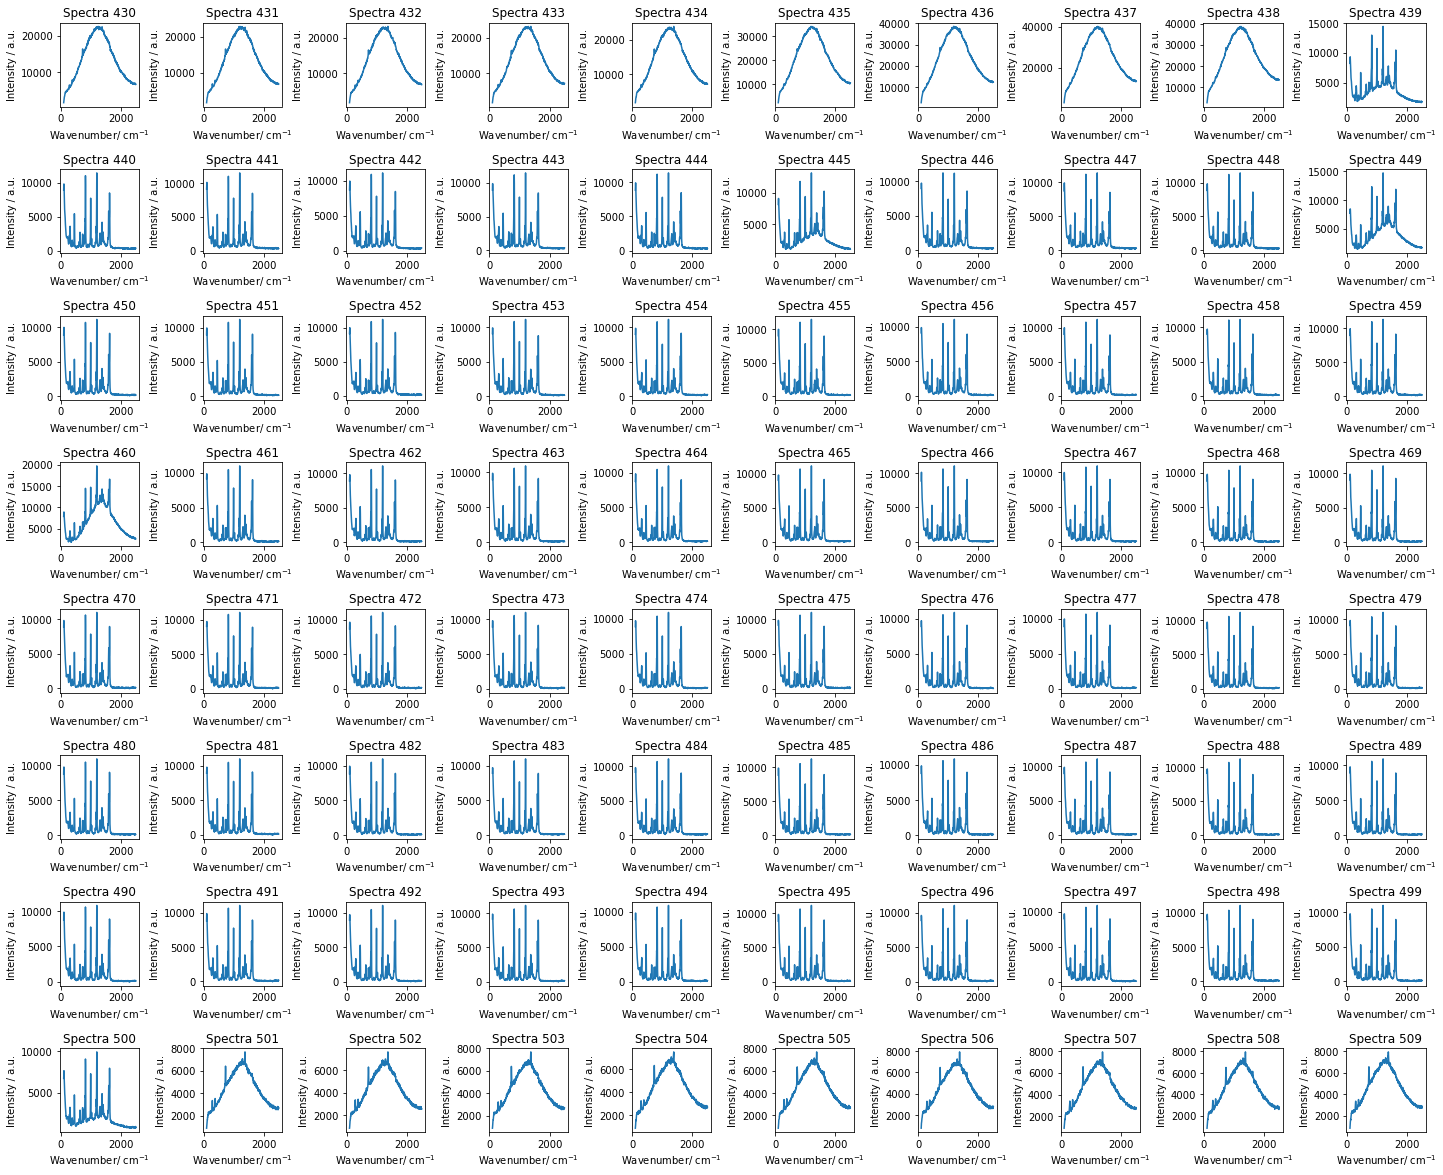

In [33]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(430, 510):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-429))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [34]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[471:490, :]
condition4_ss.insert(loc = 0, column = 'Condition', value ='C19_R1')
condition4_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
471,C19_R1,9069.0,9672.0,9761.0,9167.0,8458.0,7492.0,6660.0,6270.0,5827.0,...,147.0,66.0,213.0,148.0,135.0,129.0,163.0,162.0,142.0,116.0
472,C19_R1,8647.0,9539.0,9622.0,9149.0,8406.0,7467.0,6648.0,6152.0,5767.0,...,102.0,74.0,156.0,99.0,117.0,86.0,117.0,113.0,124.0,141.0
473,C19_R1,8903.0,9793.0,9783.0,9148.0,8256.0,7589.0,6961.0,6211.0,5831.0,...,139.0,98.0,185.0,140.0,124.0,109.0,136.0,130.0,185.0,121.0
474,C19_R1,8885.0,9730.0,9689.0,9451.0,8254.0,7528.0,6821.0,6158.0,5646.0,...,137.0,60.0,156.0,185.0,118.0,104.0,132.0,95.0,137.0,140.0
475,C19_R1,9137.0,9819.0,9608.0,9307.0,8492.0,7663.0,6774.0,6160.0,5942.0,...,106.0,23.0,169.0,127.0,183.0,161.0,166.0,71.0,176.0,167.0
476,C19_R1,8920.0,9735.0,9696.0,9225.0,8383.0,7553.0,6842.0,6203.0,5763.0,...,116.0,118.0,106.0,130.0,143.0,109.0,138.0,98.0,94.0,42.0
477,C19_R1,8878.0,9709.0,9949.0,9233.0,8456.0,7451.0,6661.0,6207.0,5669.0,...,87.0,50.0,164.0,128.0,143.0,144.0,150.0,124.0,105.0,133.0
478,C19_R1,8796.0,9709.0,9643.0,9278.0,8411.0,7702.0,6761.0,5989.0,5893.0,...,157.0,80.0,156.0,119.0,92.0,150.0,142.0,114.0,126.0,135.0
479,C19_R1,9133.0,9736.0,9842.0,9042.0,8278.0,7590.0,6772.0,6064.0,5757.0,...,84.0,88.0,146.0,101.0,99.0,129.0,166.0,98.0,163.0,126.0
480,C19_R1,8768.0,9716.0,9750.0,9084.0,8389.0,7640.0,6731.0,6179.0,5815.0,...,120.0,12.0,144.0,105.0,161.0,106.0,103.0,122.0,125.0,110.0


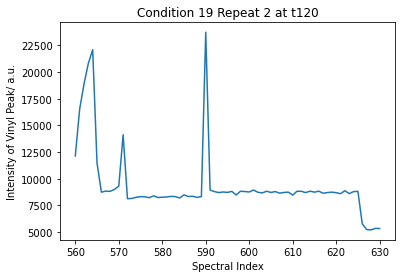

In [38]:
# Condition
df.loc[560:630,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 2 at t120')
plt.show()

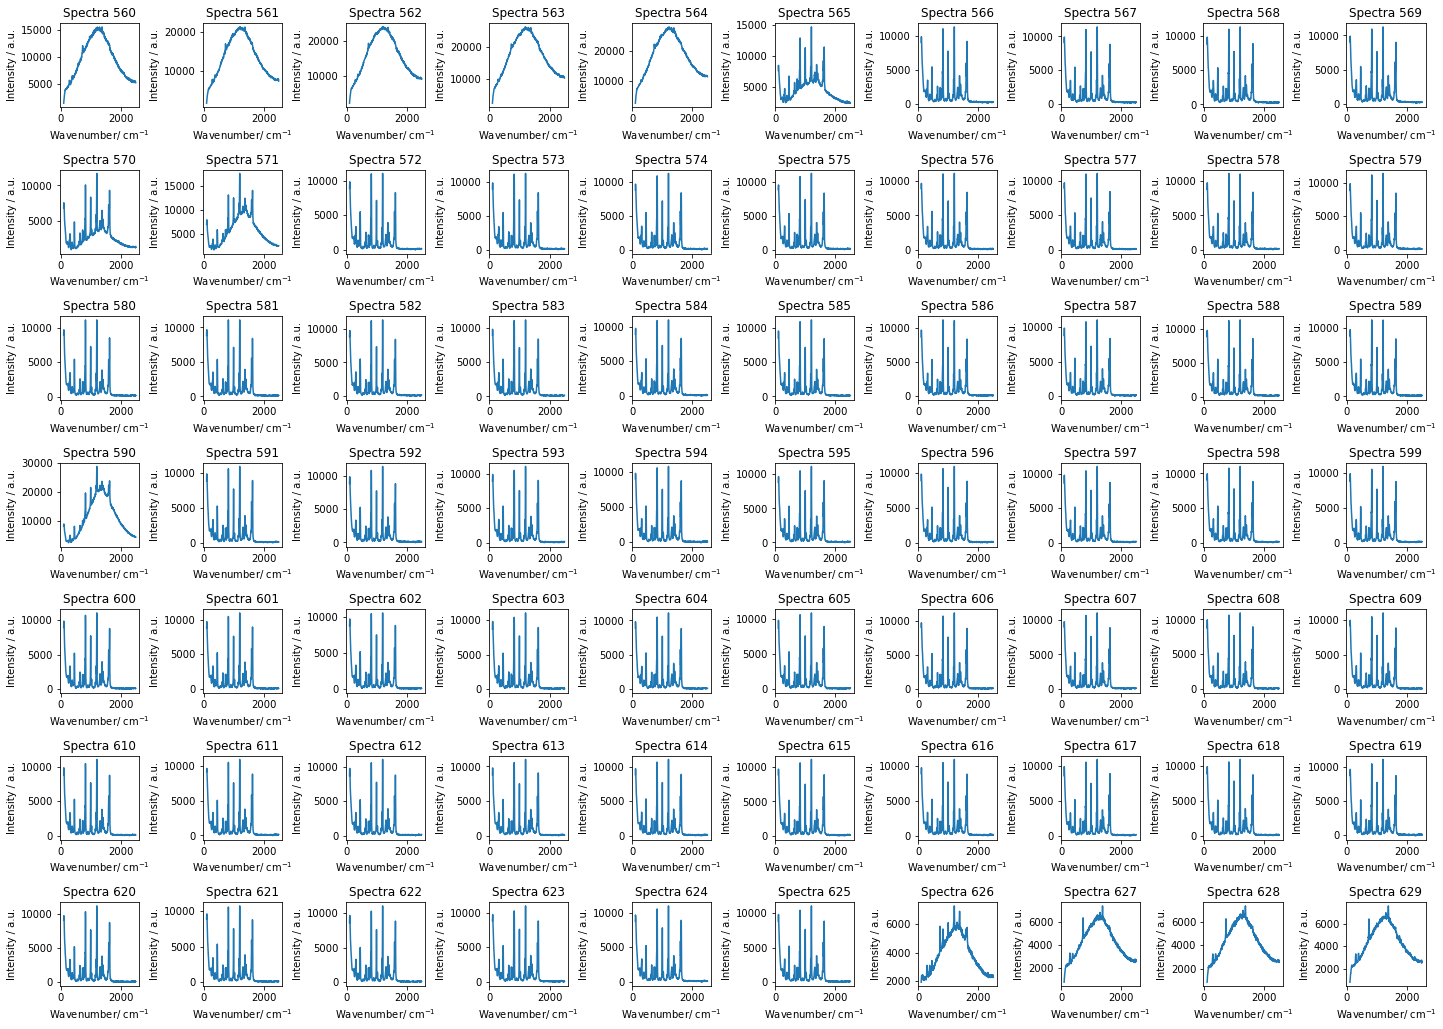

In [39]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(560, 630):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-559))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [40]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[601:620, :]
condition5_ss.insert(loc = 0, column = 'Condition', value = 'C19_R2')
condition5_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
601,C19_R2,8811.0,9528.0,9701.0,9149.0,8462.0,7638.0,6792.0,6255.0,5706.0,...,117.0,98.0,119.0,109.0,106.0,99.0,171.0,118.0,140.0,95.0
602,C19_R2,8840.0,9559.0,9776.0,9092.0,8395.0,7615.0,6697.0,6265.0,5735.0,...,129.0,73.0,155.0,102.0,98.0,84.0,110.0,99.0,144.0,94.0
603,C19_R2,8718.0,9725.0,9850.0,9166.0,8378.0,7466.0,6880.0,6110.0,5686.0,...,133.0,109.0,132.0,100.0,102.0,78.0,148.0,59.0,179.0,90.0
604,C19_R2,8879.0,9823.0,9556.0,9173.0,8345.0,7569.0,6698.0,6160.0,5703.0,...,117.0,100.0,138.0,119.0,94.0,84.0,132.0,107.0,114.0,116.0
605,C19_R2,8668.0,9803.0,9711.0,9287.0,8230.0,7369.0,6625.0,6105.0,5777.0,...,47.0,86.0,140.0,178.0,154.0,75.0,139.0,107.0,113.0,152.0
606,C19_R2,9083.0,9677.0,9722.0,9164.0,8384.0,7804.0,6758.0,6181.0,5843.0,...,118.0,117.0,183.0,137.0,144.0,141.0,116.0,118.0,184.0,138.0
607,C19_R2,8993.0,9692.0,9723.0,9185.0,8244.0,7513.0,6700.0,6146.0,5847.0,...,93.0,67.0,112.0,115.0,128.0,133.0,80.0,94.0,118.0,126.0
608,C19_R2,8784.0,9605.0,9942.0,9298.0,8320.0,7639.0,6747.0,6002.0,5783.0,...,103.0,72.0,128.0,78.0,105.0,137.0,136.0,75.0,91.0,123.0
609,C19_R2,9178.0,9891.0,9938.0,9126.0,8309.0,7522.0,6576.0,6152.0,5688.0,...,121.0,114.0,133.0,127.0,115.0,146.0,142.0,96.0,132.0,50.0
610,C19_R2,8779.0,9868.0,9679.0,9279.0,8286.0,7605.0,6611.0,6083.0,5776.0,...,97.0,97.0,180.0,117.0,118.0,108.0,107.0,85.0,133.0,104.0


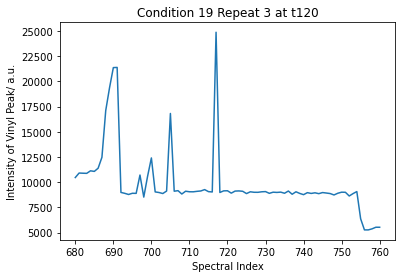

In [44]:
# Condition
df.loc[680:760,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 3 at t120')
plt.show()

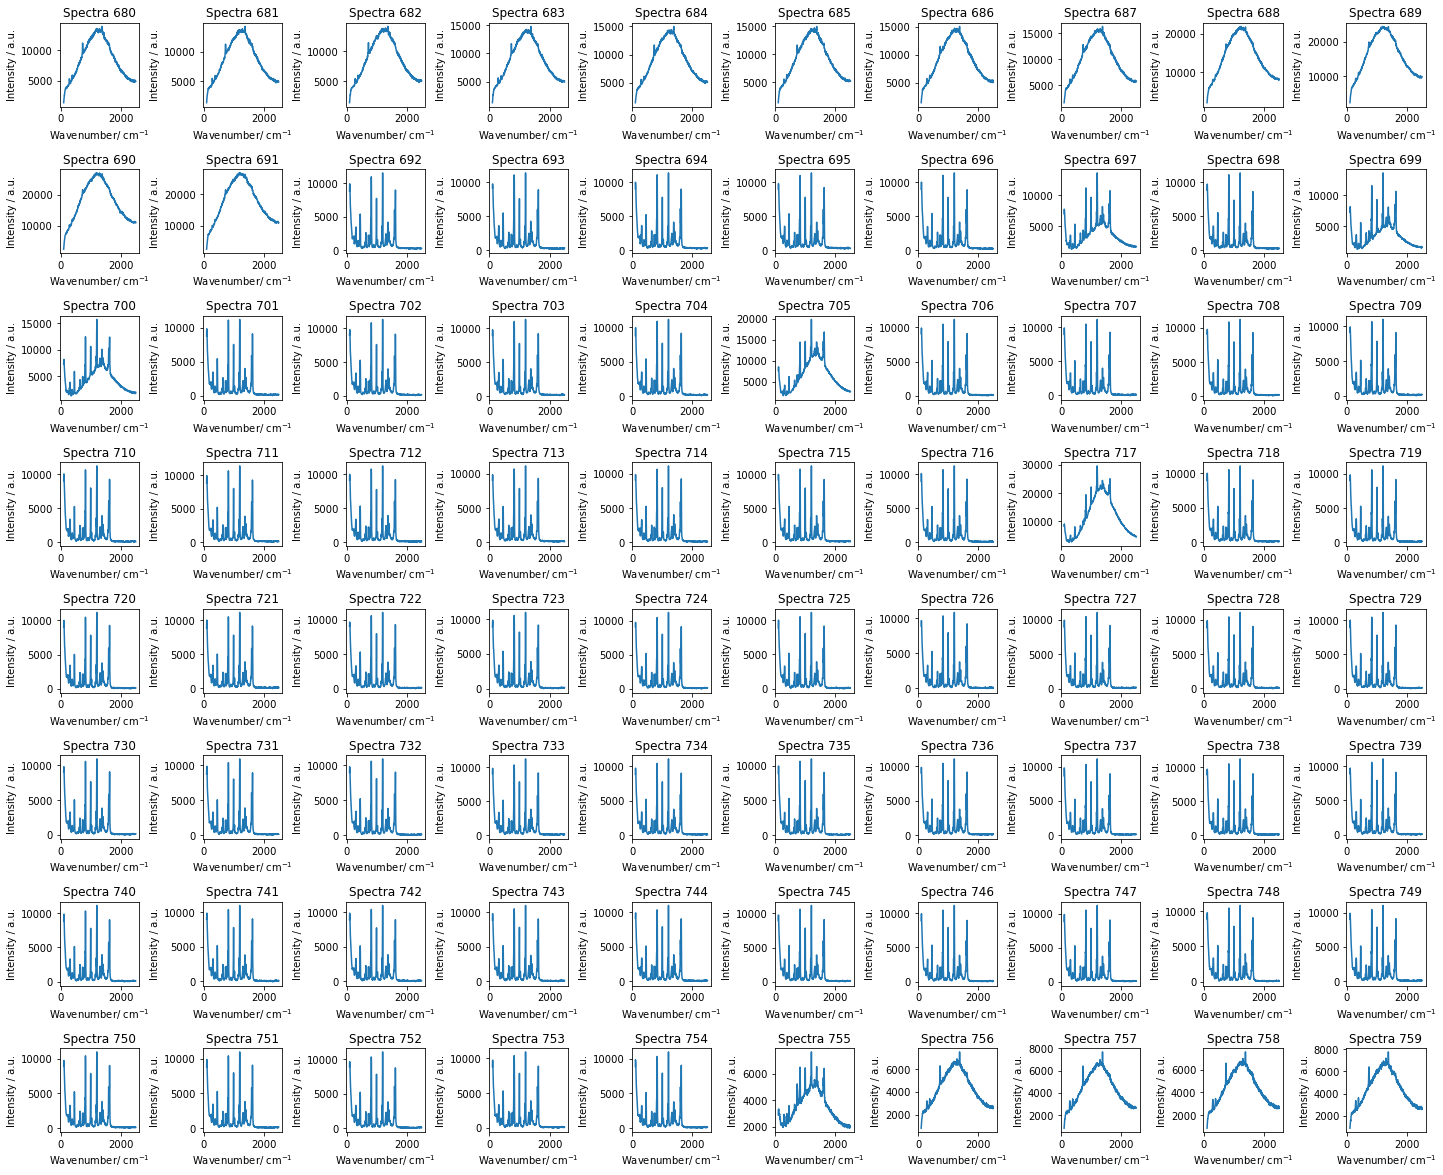

In [46]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(680, 760):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-679))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [47]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[731:750, :]
condition6_ss.insert(loc = 0, column = 'Condition', value = 'C19_R3')
condition6_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
731,C19_R3,8727.0,9674.0,9817.0,9452.0,8408.0,7688.0,6614.0,6315.0,5791.0,...,101.0,72.0,180.0,123.0,126.0,95.0,113.0,85.0,149.0,103.0
732,C19_R3,8961.0,9770.0,9694.0,9206.0,8605.0,7826.0,6850.0,6171.0,5908.0,...,84.0,68.0,118.0,200.0,121.0,130.0,143.0,75.0,77.0,120.0
733,C19_R3,9042.0,9712.0,9799.0,9253.0,8590.0,7810.0,6739.0,6293.0,5924.0,...,104.0,73.0,168.0,124.0,69.0,107.0,126.0,75.0,151.0,131.0
734,C19_R3,8847.0,9721.0,9722.0,9289.0,8596.0,7691.0,6693.0,6159.0,5887.0,...,112.0,107.0,184.0,94.0,15.0,114.0,154.0,98.0,154.0,97.0
735,C19_R3,8874.0,9734.0,9937.0,9484.0,8519.0,7739.0,6733.0,6217.0,5834.0,...,106.0,127.0,184.0,150.0,103.0,131.0,88.0,104.0,155.0,113.0
736,C19_R3,9001.0,9765.0,9797.0,9262.0,8393.0,7637.0,6872.0,6185.0,5719.0,...,93.0,65.0,144.0,135.0,96.0,127.0,156.0,72.0,193.0,108.0
737,C19_R3,8675.0,9828.0,9775.0,9478.0,8336.0,7728.0,6855.0,6164.0,5770.0,...,82.0,67.0,132.0,137.0,97.0,104.0,69.0,81.0,100.0,105.0
738,C19_R3,8916.0,9632.0,9713.0,9351.0,8496.0,7458.0,6777.0,6018.0,5778.0,...,111.0,52.0,121.0,88.0,92.0,81.0,145.0,98.0,135.0,85.0
739,C19_R3,8902.0,9592.0,9700.0,9158.0,8333.0,7677.0,6800.0,6296.0,5915.0,...,134.0,44.0,137.0,96.0,88.0,87.0,138.0,120.0,168.0,109.0
740,C19_R3,8825.0,9618.0,9837.0,9453.0,8428.0,7709.0,6831.0,6289.0,5803.0,...,99.0,77.0,121.0,126.0,111.0,150.0,145.0,115.0,111.0,88.0


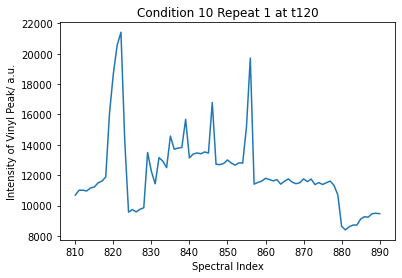

In [54]:
# Condition
df.loc[810:890,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 1 at t120')
plt.show()

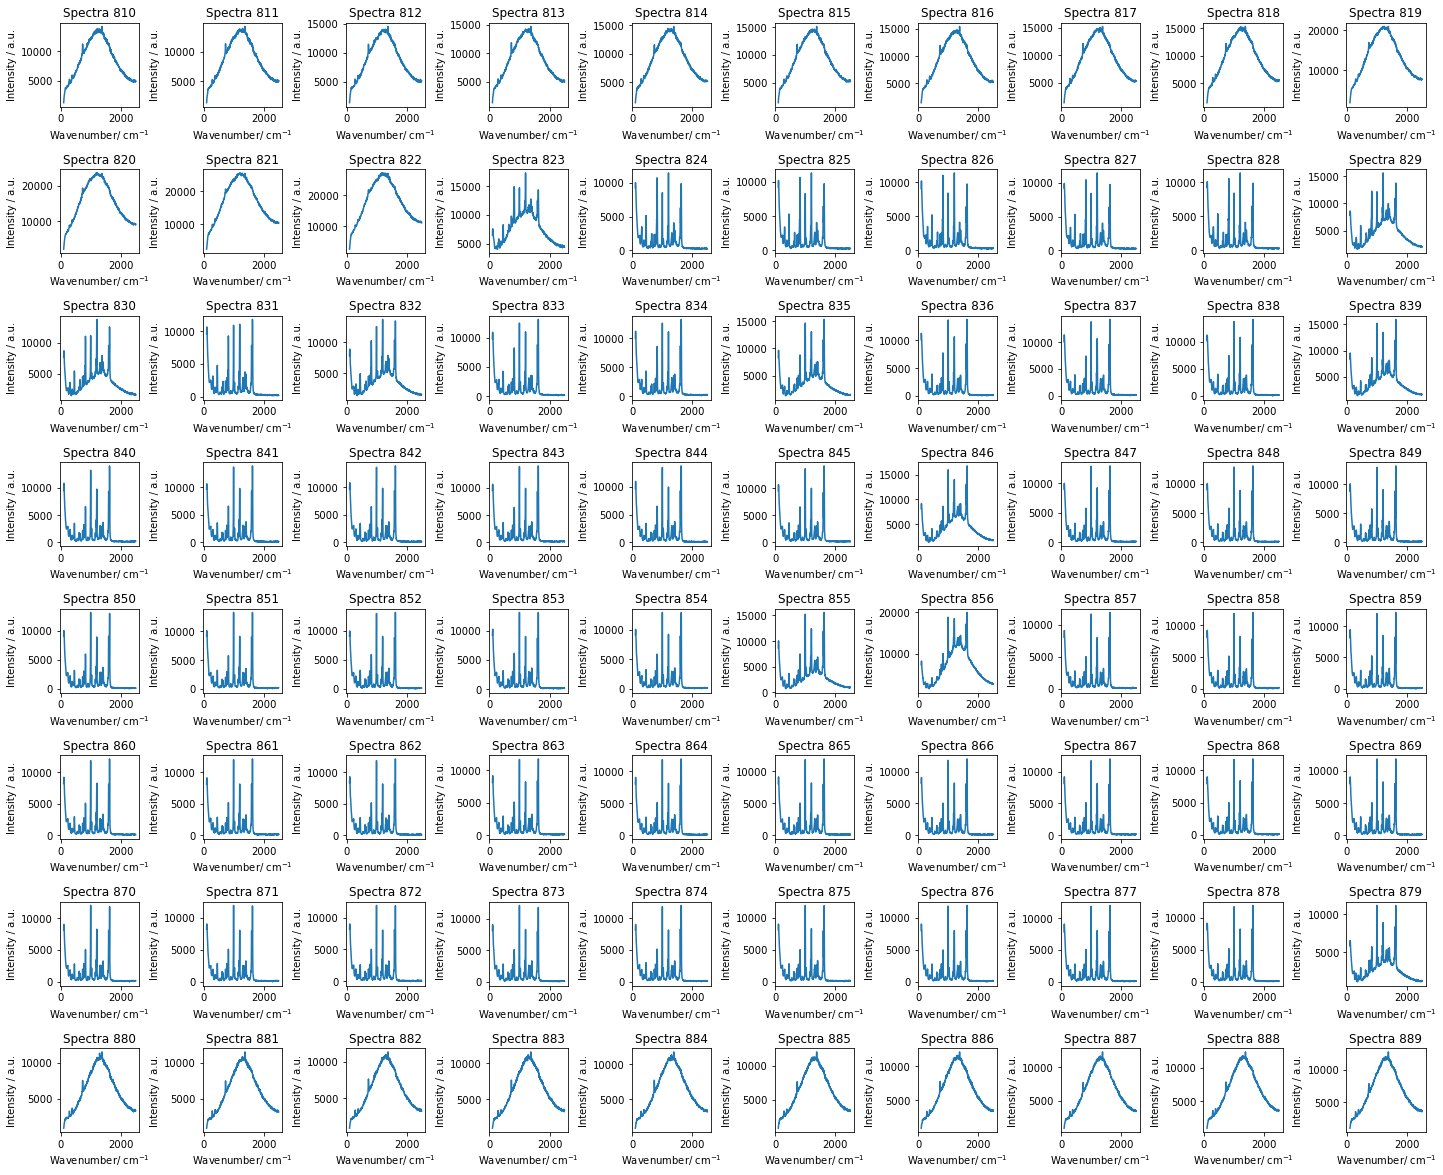

In [55]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(810, 890):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-809))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [56]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[858:877, :]
condition7_ss.insert(loc = 0, column = 'Condition', value = 'C10_R1')
condition7_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
858,C10_R1,8137.0,9074.0,9188.0,8711.0,8030.0,7334.0,6455.0,5987.0,5774.0,...,104.0,43.0,159.0,114.0,107.0,137.0,188.0,95.0,145.0,158.0
859,C10_R1,8153.0,8911.0,9422.0,8846.0,7993.0,7313.0,6711.0,6070.0,5571.0,...,125.0,81.0,141.0,190.0,105.0,159.0,76.0,127.0,121.0,147.0
860,C10_R1,8209.0,8903.0,9176.0,8784.0,7990.0,7474.0,6458.0,6215.0,5664.0,...,38.0,91.0,118.0,113.0,106.0,128.0,116.0,124.0,129.0,70.0
861,C10_R1,8083.0,8996.0,9120.0,8760.0,8083.0,7282.0,6557.0,6152.0,5683.0,...,73.0,73.0,154.0,118.0,80.0,81.0,114.0,49.0,200.0,118.0
862,C10_R1,8288.0,9055.0,9232.0,8580.0,7904.0,7278.0,6511.0,5916.0,5870.0,...,94.0,9.0,97.0,93.0,59.0,117.0,136.0,81.0,124.0,69.0
863,C10_R1,8097.0,8911.0,9109.0,8726.0,7928.0,7035.0,6702.0,6005.0,5748.0,...,123.0,91.0,99.0,91.0,110.0,82.0,96.0,80.0,102.0,115.0
864,C10_R1,8025.0,8861.0,9064.0,8664.0,7905.0,7348.0,6482.0,5840.0,5558.0,...,142.0,19.0,93.0,111.0,100.0,91.0,97.0,64.0,117.0,139.0
865,C10_R1,8097.0,8672.0,9149.0,8692.0,8075.0,7356.0,6588.0,5994.0,5562.0,...,84.0,14.0,120.0,145.0,104.0,99.0,143.0,45.0,124.0,67.0
866,C10_R1,8194.0,8876.0,9072.0,8486.0,7851.0,7359.0,6732.0,6072.0,5663.0,...,146.0,70.0,136.0,133.0,86.0,69.0,123.0,100.0,165.0,127.0
867,C10_R1,8154.0,8970.0,9191.0,8683.0,7990.0,7321.0,6615.0,6107.0,5559.0,...,106.0,69.0,124.0,94.0,128.0,101.0,130.0,114.0,127.0,159.0


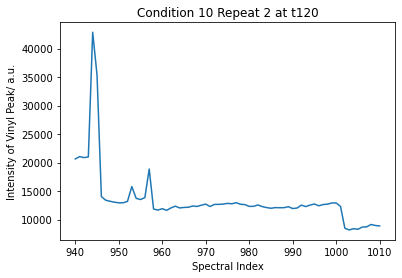

In [59]:
# Condition
df.loc[940:1010,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 2 at t120')
plt.show()

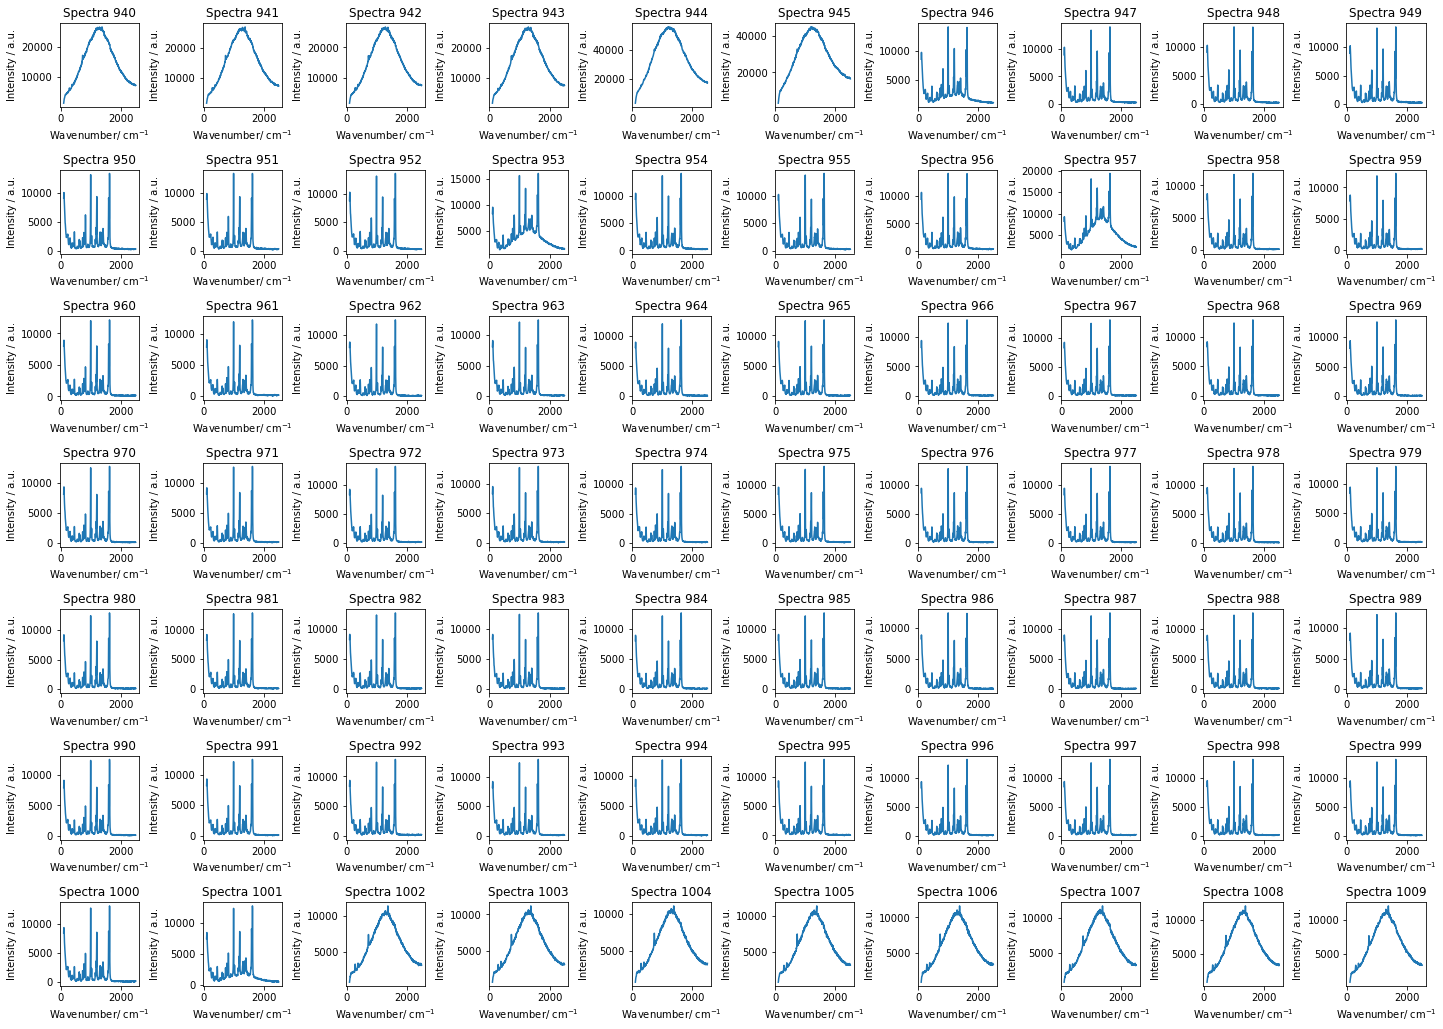

In [60]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(940, 1010):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-939))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [62]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[971:990, :]
condition8_ss.insert(loc = 0, column = 'Condition', value = 'C10_R2')
condition8_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
971,C10_R2,8199.0,9074.0,9190.0,8810.0,8147.0,7497.0,6680.0,6041.0,5806.0,...,137.0,111.0,153.0,162.0,110.0,120.0,128.0,118.0,154.0,140.0
972,C10_R2,8354.0,9193.0,9251.0,8926.0,8277.0,7507.0,6827.0,6284.0,5636.0,...,90.0,132.0,158.0,157.0,125.0,93.0,129.0,121.0,131.0,124.0
973,C10_R2,8308.0,9217.0,9489.0,8918.0,8373.0,7823.0,6945.0,6054.0,5900.0,...,130.0,134.0,181.0,129.0,137.0,192.0,176.0,148.0,157.0,127.0
974,C10_R2,8319.0,9291.0,9394.0,9256.0,8302.0,7586.0,6990.0,6415.0,5898.0,...,156.0,96.0,178.0,135.0,161.0,134.0,140.0,71.0,164.0,116.0
975,C10_R2,8435.0,9329.0,9644.0,9057.0,8388.0,7655.0,6957.0,6389.0,5965.0,...,125.0,122.0,152.0,90.0,102.0,86.0,183.0,125.0,153.0,158.0
976,C10_R2,8680.0,9432.0,9464.0,9270.0,8433.0,7773.0,6722.0,6515.0,5971.0,...,140.0,72.0,150.0,123.0,114.0,115.0,126.0,106.0,127.0,133.0
977,C10_R2,8350.0,9269.0,9460.0,9169.0,8388.0,7812.0,6880.0,6383.0,5994.0,...,106.0,51.0,119.0,151.0,133.0,106.0,147.0,103.0,145.0,97.0
978,C10_R2,8493.0,9351.0,9491.0,9107.0,8292.0,7606.0,6954.0,6337.0,5688.0,...,63.0,85.0,155.0,121.0,122.0,115.0,119.0,77.0,137.0,82.0
979,C10_R2,8413.0,9136.0,9415.0,8889.0,8169.0,7333.0,6722.0,6182.0,5862.0,...,112.0,87.0,134.0,98.0,137.0,126.0,143.0,123.0,127.0,126.0
980,C10_R2,8229.0,9144.0,9219.0,9052.0,7943.0,7388.0,6760.0,6115.0,5708.0,...,97.0,87.0,168.0,137.0,139.0,114.0,119.0,136.0,196.0,115.0


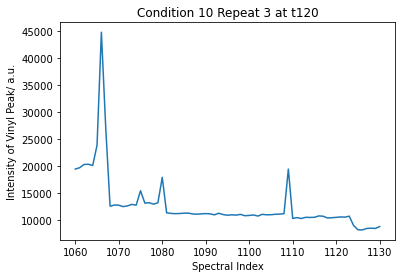

In [66]:
# Condition
df.loc[1060:1130,'1629.466023'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 3 at t120')
plt.show()

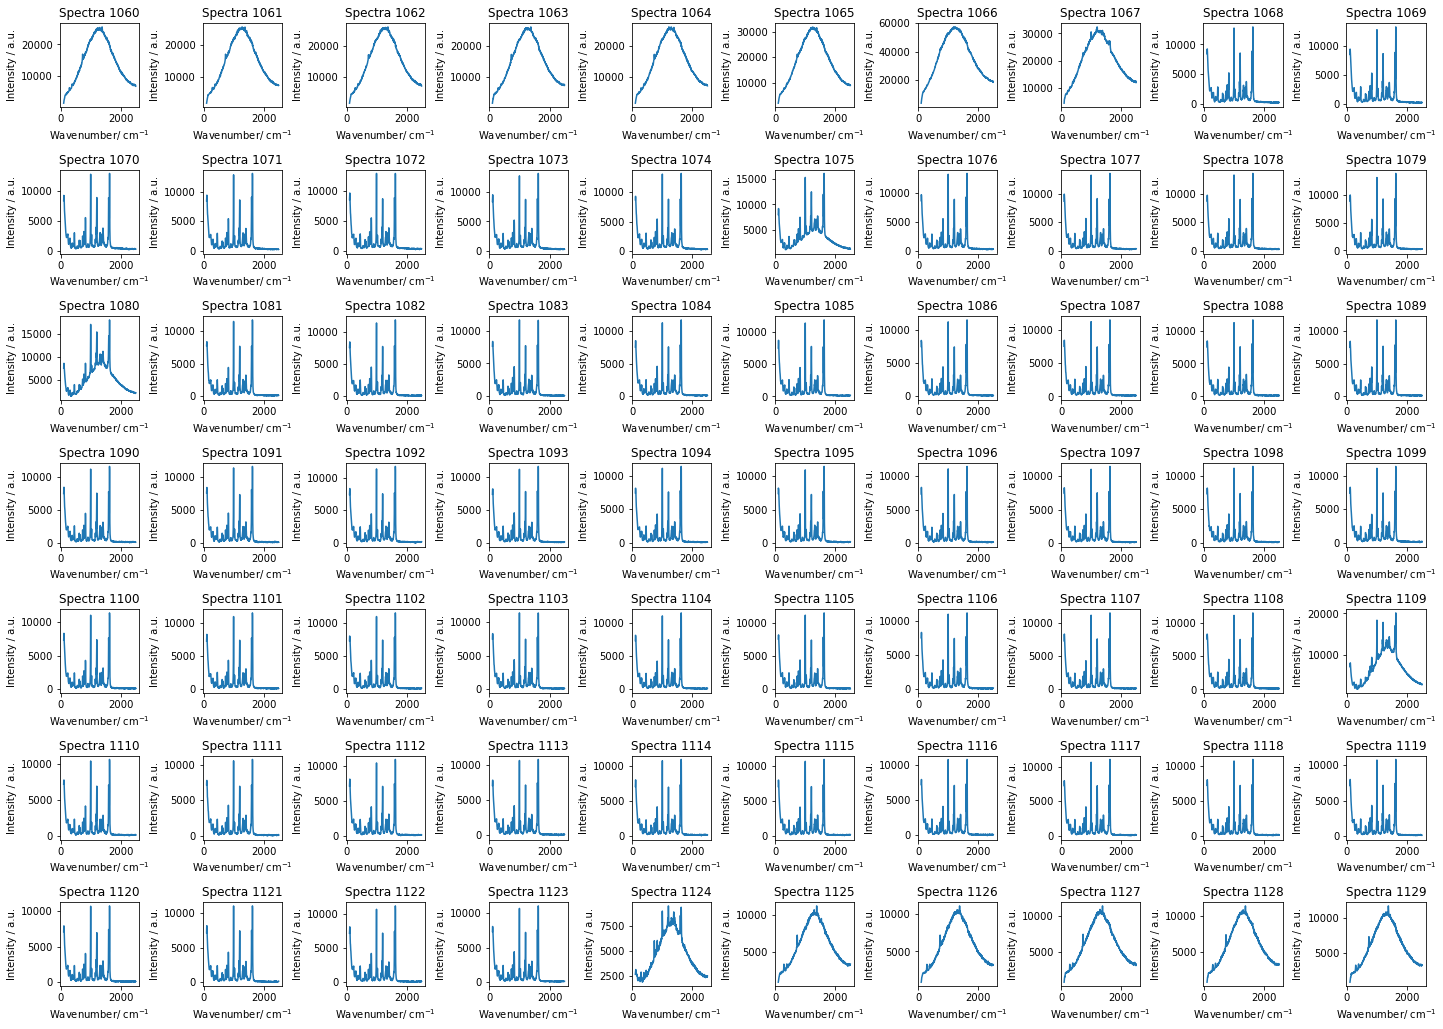

In [67]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(1060, 1130):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-1059))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [68]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[1089:1108, :]
condition9_ss.insert(loc = 0, column = 'Condition', value = 'C10_R3')
condition9_ss

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
1089,C10_R3,7476.0,8105.0,8397.0,7926.0,7298.0,6882.0,6058.0,5589.0,5243.0,...,83.0,64.0,150.0,141.0,137.0,118.0,132.0,79.0,158.0,112.0
1090,C10_R3,7545.0,8255.0,8486.0,8017.0,7320.0,6780.0,6003.0,5530.0,5304.0,...,179.0,105.0,190.0,190.0,154.0,147.0,160.0,150.0,144.0,116.0
1091,C10_R3,7567.0,8195.0,8376.0,8016.0,7655.0,6466.0,6038.0,5577.0,5176.0,...,127.0,99.0,144.0,99.0,123.0,126.0,150.0,97.0,158.0,116.0
1092,C10_R3,7407.0,8043.0,8328.0,7964.0,7428.0,6683.0,6146.0,5509.0,5195.0,...,98.0,114.0,151.0,135.0,133.0,122.0,146.0,91.0,100.0,173.0
1093,C10_R3,7388.0,8100.0,8208.0,8184.0,7281.0,6770.0,6003.0,5498.0,5209.0,...,145.0,87.0,191.0,106.0,115.0,158.0,160.0,109.0,142.0,153.0
1094,C10_R3,7452.0,8106.0,8153.0,7827.0,7428.0,6534.0,5996.0,5450.0,5135.0,...,147.0,77.0,172.0,149.0,146.0,123.0,138.0,96.0,158.0,124.0
1095,C10_R3,7407.0,8224.0,8033.0,7984.0,7243.0,6697.0,5908.0,5622.0,5056.0,...,107.0,101.0,127.0,169.0,145.0,131.0,191.0,149.0,135.0,152.0
1096,C10_R3,7336.0,8251.0,8324.0,7725.0,7183.0,6646.0,5938.0,5528.0,5079.0,...,150.0,104.0,144.0,155.0,144.0,107.0,152.0,104.0,176.0,113.0
1097,C10_R3,7446.0,8238.0,8196.0,7815.0,7227.0,6780.0,5939.0,5539.0,5181.0,...,159.0,166.0,189.0,163.0,151.0,137.0,173.0,122.0,189.0,124.0
1098,C10_R3,7298.0,8065.0,8136.0,7918.0,7185.0,6613.0,5945.0,5590.0,5192.0,...,82.0,57.0,103.0,131.0,96.0,137.0,73.0,84.0,100.0,142.0


In [69]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
91,C1_R1,8862.0,9434.0,9463.0,8940.0,8046.0,7560.0,6535.0,5880.0,5800.0,...,138.0,117.0,157.0,173.0,99.0,174.0,149.0,145.0,129.0,190.0
92,C1_R1,8473.0,9471.0,9488.0,9014.0,8129.0,7372.0,6619.0,5891.0,5608.0,...,105.0,63.0,193.0,95.0,174.0,162.0,169.0,144.0,151.0,152.0
93,C1_R1,8700.0,9357.0,9703.0,8901.0,8187.0,7381.0,6661.0,5979.0,5499.0,...,74.0,96.0,178.0,142.0,108.0,140.0,135.0,150.0,182.0,163.0
94,C1_R1,8760.0,9131.0,9566.0,8996.0,8178.0,7358.0,6592.0,6201.0,5481.0,...,109.0,125.0,159.0,175.0,159.0,154.0,177.0,77.0,194.0,113.0
95,C1_R1,8579.0,9359.0,9611.0,9183.0,8067.0,7335.0,6469.0,6073.0,5525.0,...,145.0,148.0,197.0,167.0,129.0,108.0,154.0,150.0,149.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,C10_R3,7365.0,8167.0,8169.0,7951.0,7309.0,6597.0,5853.0,5369.0,5137.0,...,150.0,152.0,166.0,137.0,140.0,183.0,166.0,111.0,162.0,156.0
1105,C10_R3,7535.0,7877.0,8147.0,7872.0,7283.0,6632.0,6065.0,5520.0,5075.0,...,150.0,109.0,144.0,208.0,155.0,109.0,139.0,130.0,177.0,105.0
1106,C10_R3,7574.0,7891.0,8365.0,8068.0,7231.0,6674.0,5895.0,5459.0,5177.0,...,95.0,113.0,193.0,143.0,120.0,110.0,152.0,143.0,153.0,186.0
1107,C10_R3,7282.0,8168.0,8299.0,7962.0,7319.0,6688.0,6015.0,5499.0,5172.0,...,112.0,87.0,202.0,102.0,185.0,121.0,172.0,136.0,184.0,149.0


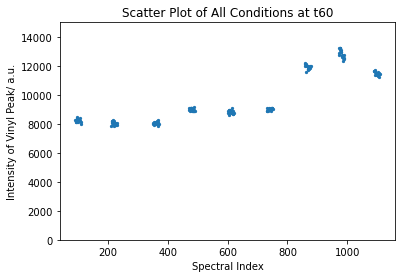

In [70]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t60')
plt.ylim(0, 15000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [71]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [72]:
# Inspect df_.
df_

,Condition,99.466474,103.977689,108.486724,112.991457,117.494015,121.994401,126.490494,130.982299,135.476179,...,2470.127521,2473.292006,2476.455263,2479.615672,2482.776474,2485.936050,2489.092782,2492.249908,2495.404193,2498.554024
91,C1_R1,8862.0,9434.0,9463.0,8940.0,8046.0,7560.0,6535.0,5880.0,5800.0,...,138.0,117.0,157.0,173.0,99.0,174.0,149.0,145.0,129.0,190.0
92,C1_R1,8473.0,9471.0,9488.0,9014.0,8129.0,7372.0,6619.0,5891.0,5608.0,...,105.0,63.0,193.0,95.0,174.0,162.0,169.0,144.0,151.0,152.0
93,C1_R1,8700.0,9357.0,9703.0,8901.0,8187.0,7381.0,6661.0,5979.0,5499.0,...,74.0,96.0,178.0,142.0,108.0,140.0,135.0,150.0,182.0,163.0
94,C1_R1,8760.0,9131.0,9566.0,8996.0,8178.0,7358.0,6592.0,6201.0,5481.0,...,109.0,125.0,159.0,175.0,159.0,154.0,177.0,77.0,194.0,113.0
95,C1_R1,8579.0,9359.0,9611.0,9183.0,8067.0,7335.0,6469.0,6073.0,5525.0,...,145.0,148.0,197.0,167.0,129.0,108.0,154.0,150.0,149.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,C10_R3,7365.0,8167.0,8169.0,7951.0,7309.0,6597.0,5853.0,5369.0,5137.0,...,150.0,152.0,166.0,137.0,140.0,183.0,166.0,111.0,162.0,156.0
1105,C10_R3,7535.0,7877.0,8147.0,7872.0,7283.0,6632.0,6065.0,5520.0,5075.0,...,150.0,109.0,144.0,208.0,155.0,109.0,139.0,130.0,177.0,105.0
1106,C10_R3,7574.0,7891.0,8365.0,8068.0,7231.0,6674.0,5895.0,5459.0,5177.0,...,95.0,113.0,193.0,143.0,120.0,110.0,152.0,143.0,153.0,186.0
1107,C10_R3,7282.0,8168.0,8299.0,7962.0,7319.0,6688.0,6015.0,5499.0,5172.0,...,112.0,87.0,202.0,102.0,185.0,121.0,172.0,136.0,184.0,149.0


In [73]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.466023']].groupby('Condition').describe()

1629.466023                                                    \
                count      mean         std      min       25%      50%   
Condition                                                                 
C10_R1           20.0  11583.35  129.675415  11378.0  11501.50  11591.5   
C10_R2           20.0  12416.05  313.858244  11937.0  12107.00  12324.0   
C10_R3           20.0  11057.75  135.292617  10787.0  10976.00  11048.5   
C19_R1           20.0   8740.60  105.993247   8452.0   8692.25   8758.0   
C19_R2           20.0   8738.55   99.436028   8464.0   8698.75   8734.5   
C19_R3           20.0   8922.80   95.265612   8731.0   8879.75   8911.5   
C1_R1            20.0   8162.60  113.072590   8004.0   8047.75   8204.5   
C1_R2            20.0   7965.95  119.126414   7744.0   7873.25   7984.0   
C1_R3            20.0   7883.75  151.103964   7564.0   7820.00   7885.5   

                              
                75%      max  
Condition                     
C10_R1     11706.25  11791.0  
C10_R2     12673.00  12964.0  
C10_R3     11152.00  11302.0  
C19_R1      8806.50   8939.0  
C19_R2      8819.25   8940.0  
C19_R3      8988.75   9120.0  
C1_R1       8253.00   8335.0  
C1_R2       8041.00   8226.0  
C1_R3       7990.25   8152.0

In [74]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\210224 High Throughput Experiment Conditions 1, 19 and 10 Repeat\Raman\df_t120.csv')